In [1]:
import numpy as np
import matplotlib.pyplot as plt

from imageio import imread

(500, 500)


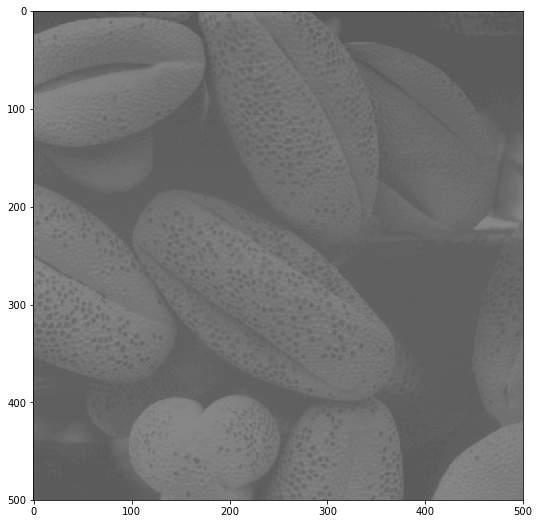

In [33]:
im = imread("../../samples/Pollen3.jpg", pilmode="L")

#im = resize(im, (128, 128), anti_aliasing=True, mode="reflect")

print(im.shape)

fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(im, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()

In [34]:
def histogram(im):
    h, w = im.shape
    hist = np.zeros(255, dtype=np.int32)
    
    for i in range(h):
        for j in range(w):
            pixel = im[i, j]
            
            hist[pixel] = hist[pixel] + 1
    
    return hist

In [35]:
def histogram2(im):
    h, w = im.shape
    hist = np.zeros(256, dtype=np.int32)
    
    for i in range(256):
        hist[i] = (im==i).sum()
        
    return hist

In [36]:
def plot_histogram(im, histo):
    fig, axs = plt.subplots(2,1, figsize=(16,9))
    
    axs[0].imshow(im, vmin=0, vmax=255, cmap=plt.cm.gray)
    
    axs[1].bar(x=np.arange(256), height=histo, width=1)
    
    plt.show()
    plt.close()

CPU times: user 136 ms, sys: 41 µs, total: 136 ms
Wall time: 134 ms


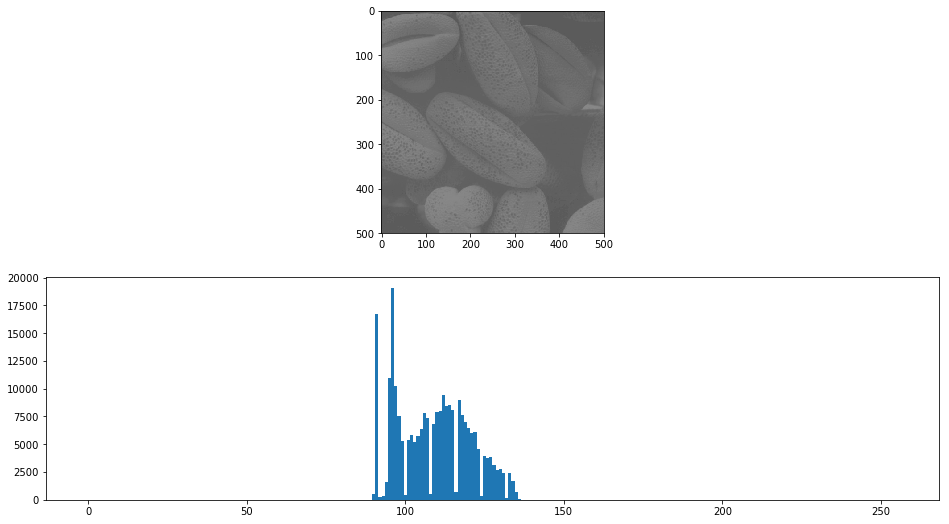

In [37]:
# %time hist1 = histogram(im)
%time hist2 = histogram2(im)

# plot_histogram(im, hist1)
plot_histogram(im, hist2)

In [38]:
def lin_histogram(im):
    h, w = im.shape
    histo = histogram2(im)
    
    histo = histo / histo.sum()
    
    cumm_histo = np.cumsum(histo)
    print(cumm_histo.shape)
    res = np.zeros_like(im)   
    
    for i in range(h):
        for j in range(w):
            pixel = im[i,j]
            
            res[i,j] = cumm_histo[pixel] * 255
    return res

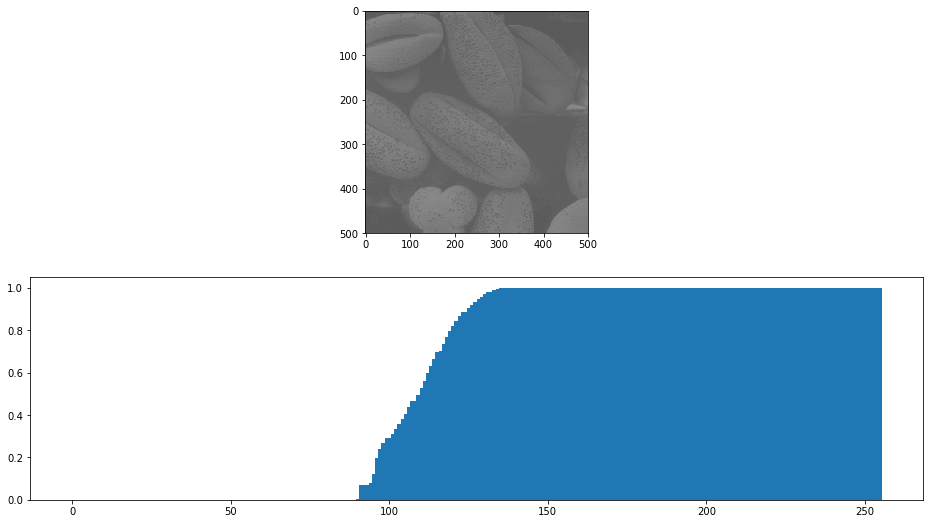

In [39]:
histo = histogram2(im)
histo = histo / histo.sum()

cumm_h = np.cumsum(histo)
plot_histogram(im, cumm_h)

(256,)


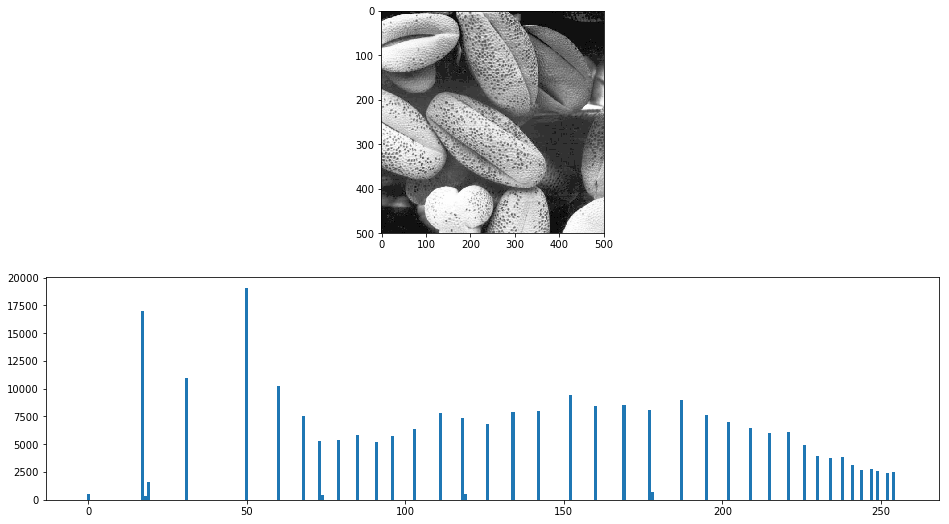

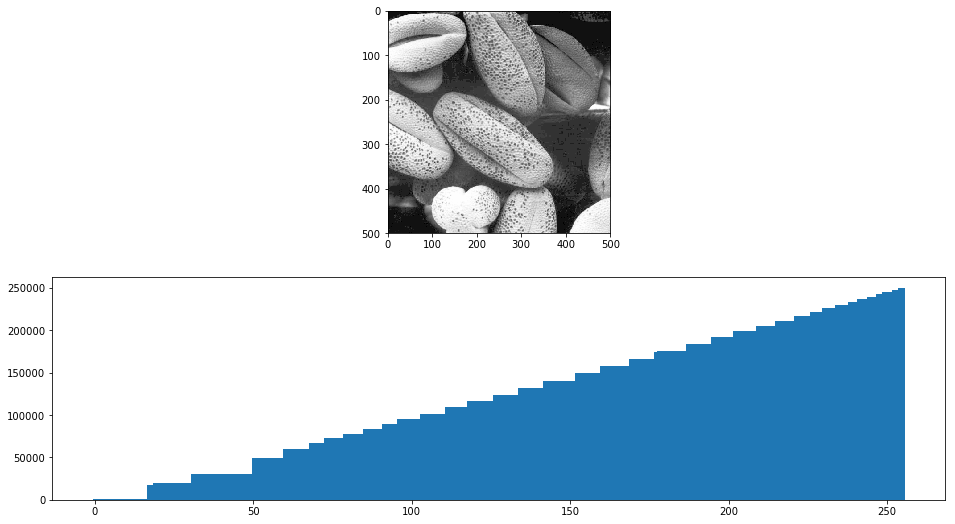

In [40]:
lin_im = lin_histogram(im)

histo = histogram2(lin_im)

cum_histo = np.cumsum(histo)

plot_histogram(lin_im, histo)
plot_histogram(lin_im, cum_histo)